In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from math import comb 

In [2]:
def simulate(n, p, T, d):
    samples = []
    for _ in range(n):
        num_Tails = 0
        t = 0
        while t < T:
            t += 1
            c_t = np.random.binomial(n=1, p=1-p)
            if c_t: # Tail
                t += d
                num_Tails += 1
        samples.append(num_Tails) 
    
    counts= Counter(samples)
    x = np.array(sorted(counts))
    probs = np.array([counts[val] for val in x]) / len(samples)

   # Plot PMF using a basic stem plot
    fig, ax = plt.subplots()
    markerline, stemlines, baseline = ax.stem(x, probs)
    plt.setp(markerline, 'markerfacecolor', 'blue')
    plt.setp(stemlines, 'color', 'gray')
    plt.xlabel('Value')
    plt.ylabel('Estimated Probability')
    plt.title('Estimated Discrete Probability Distribution')
    plt.grid(True)
    plt.show()
    most_common = counts.most_common(1)[0]
    return samples,x, probs, most_common

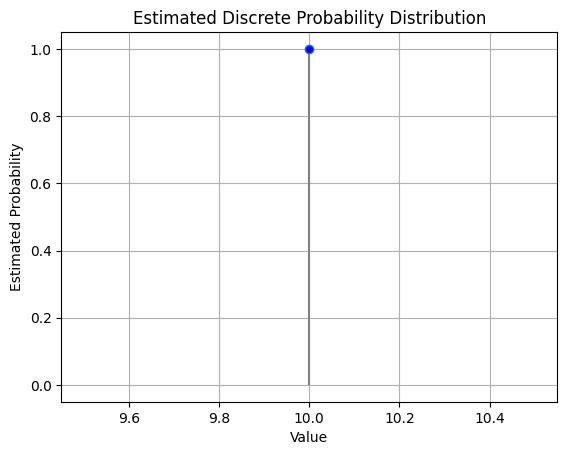

(10, 1000)

In [12]:
samples,x, probs, x_max = simulate(1000, 0.65, 2000, 199)
x_max

In [79]:
set(samples)

{49, 50, 52, 53, 54, 55, 57, 58}

In [139]:
probs

array([0.015, 0.985])

In [214]:
def prob(i,T,d, p):
    frst = comb(T-i*(d+1)+1, i) * (1-p)**i *p**(T-i*(d+1))
    # print(frst)
    scnd = 0
    for x in range(1,d):
        scnd += comb(d-x+i-1, i-1)*(1-p)**i *p**(T-i*(d+1)+d-x)
    return frst+scnd

In [220]:
T, d = 1000, 19
r = int(T/(d+1))
s = 0
for i in range(1,r):
    s1 = prob(i, T, d, 0.9)
    s += s1
    print(i,s1)
print("sum: ", s)    

1 1.4213513524798447e-43
2 5.455442825113826e-41
3 1.3464548399642936e-38
4 2.3828851877029718e-36
5 3.220127159359137e-34
6 3.4555842132172744e-32
7 3.0236417757259608e-30
8 2.198127747347822e-28
9 1.3460887567651687e-26
10 7.015749620560632e-25
11 3.136468364283358e-23
12 1.2098441533569441e-21
13 4.0442586116456914e-20
14 1.17525724570816e-18
15 2.9752455197678126e-17
16 6.569399229254707e-16
17 1.2656219942213577e-14
18 2.1266281568324607e-13
19 3.1132053101258656e-12
20 3.9633576129396774e-11
21 4.3768025551707224e-10
22 4.178931339403628e-09
23 3.4357633446560575e-08
24 2.420458406355053e-07
25 1.45261241076517e-06
26 7.375437239063579e-06
27 3.1427168196672284e-05
28 0.00011132768135612297
29 0.00032425814858166434
30 0.0007665846710833198
31 0.0014488490530119357
32 0.0021503224719746426
33 0.0024533676467957434
34 0.0020976608968362154
35 0.0013032860766988776
36 0.0005666339115040567
37 0.00016451647643250927
38 3.0070139235125838e-05
39 3.2070625321046393e-06
40 1.8057573882

In [193]:
comb(8000,500)

3473642112165736882976811416294240416443188443744689930076731928700388927601559281748415304928653635838674017342448369808182234037452280111907086465620062906521114213209439389065198891626981652221033889000476709950208346753221468966999358328347288813378943121094548032224295507882276746642019498136471976130858089928271396299371997053941078698935070588520425668926508902639918412839650656107297193349356772673329398093438973984407372769190720958695910456098816274058280623615591694568059537748260944643462154210799087028426142453415658795707450019830206429278260243463153866231405379698251815133471362747938684765582623512306221729781840412639502664014623438492303614514792124108653705831781487087421748058413441179146180937497540614985486879576297623520460573430788642984394346687437850326027170406360229045376

In [10]:
def prob1(i,T,d, p):
    frst = comb(T-i*d, i) * (1-p)**i *p**(T-i*(d+1)) # i*(d+1) untosses slots
    scnd = 0
    for x in range(1,d):
        n = T-i*(d)+x
        if n < 0:
            break
        scnd += comb(T-i*(d+1)+x + i - 1 , i-1) *p**(-x)
    return frst+scnd*(1-p)**i *p**(T-i*(d+1))

In [15]:
6/200

0.03

In [14]:
T, d = 2000, 59
r = int(T/(d+1))
s = 0
probabs = []
for i in range(1,r+1):
    s1 = prob1(i, T, d, 0.3)
    s += s1
    probabs.append(s1)
prbs = np.array(probabs)/s
print(r,np.argmax(prbs)+1)  
prbs

33 33


array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.13382778e-267,
       8.52861470e-236, 2.04001781e-204, 2.63684368e-173, 1.59395900e-142,
       3.63690930e-112, 2.23237392e-082, 2.05333095e-053, 8.89212790e-026,
       1.00000000e+000])

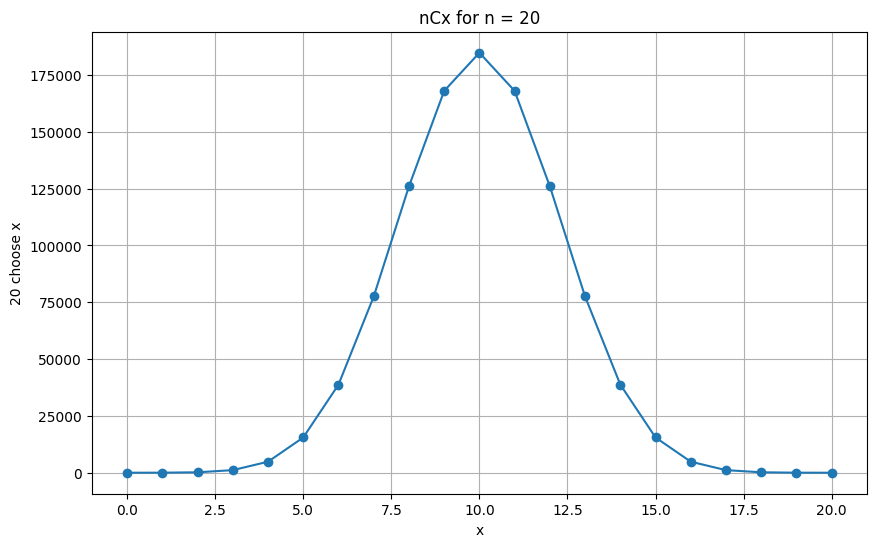

In [259]:
import matplotlib.pyplot as plt
import math

# Set a fixed n
n = 20

# Generate x values and corresponding nCx
x_vals = list(range(n + 1))
nCx_vals = [math.comb(n, x) for x in x_vals]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_vals, nCx_vals, marker='o')
plt.title(f"nCx for n = {n}")
plt.xlabel("x")
plt.ylabel(f"{n} choose x")
plt.grid(True)
plt.show()
